# Diamonds Dataset EDA

In [1]:
import pandas as pd
diamond = pd.read_csv("diamonds.csv")
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Remove the unnamed column from the dataframe.

In [2]:
diamond = diamond[["carat","cut","color","clarity","depth","table","price","x","y","z"]]
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamond["depth"][2]

56.9

## Create a new column called as "volume"(volume=xyz)

In [4]:
import numpy as np
diamond["volume"] = diamond["x"]*diamond["y"]*diamond["z"]
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


## Check if categeorical values have any spelling errors

In [5]:
diamond["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [6]:
diamond["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [7]:
diamond["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [8]:
diamond['cut'] = pd.Categorical(diamond.cut)
diamond['color'] = pd.Categorical(diamond.color)
diamond['clarity'] = pd.Categorical(diamond.clarity)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


## Average price of a diamond for every color. Plotted a chart to validate.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
avg_price = diamond.groupby("color")['price'].mean()
avg_carat = diamond.groupby("color")['carat'].mean()
print(avg_price)
xticks = np.arange(7) 
width = 0.35
plt.figure()
plt.bar(xticks, avg_price, width, label='Avg Price')
plt.bar(xticks + width, avg_carat, width, label='Avg Carat')
plt.legend()
plt.show()

color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64


<Figure size 640x480 with 1 Axes>

## Plot a graph of average price & average carat value on the same graph for every color of the diamond.

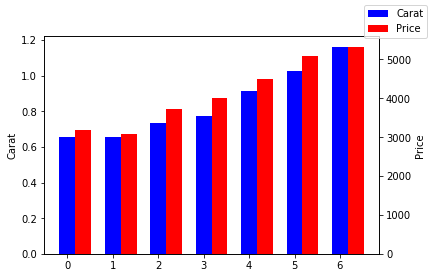

In [10]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(xticks, avg_carat, color='b',width=width, label='Carat')
ax2.bar(xticks+width, avg_price, color='r', width=width, label='Price')
fig.legend()
ax1.set_ylabel('Carat')
ax2.set_ylabel('Price')
plt.show()

## Observed that average price increases with average carat value for every color

## Find out the carat value, depth value of diamond having the highest price.

In [11]:
select = diamond[diamond["price"] == diamond["price"].max()]
print("Carat Value = {0:.2f}".format(float(select["carat"])))
print("Depth Value = {0:.2f}".format(float(select["depth"])))

Carat Value = 2.29
Depth Value = 60.80


## Plot the histogram of the price column.

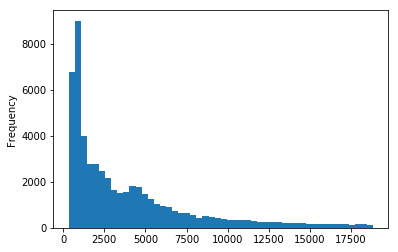

In [12]:
diamond["price"].plot.hist(bins=50)

## Plot the histogram of the carat column.

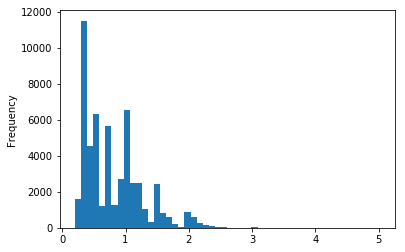

In [13]:
diamond["carat"].plot.hist(bins=50)

## Hence observed that most data is of diamonds having lower price and and carat value

## Plot a chart to validate which cut of the diamonds have highest average price


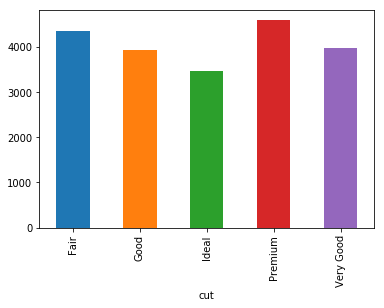

In [14]:
toplot1 = diamond.groupby("cut").mean()
toplot1.price.plot.bar()

### Premium Cut has the highest average prize

## A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.

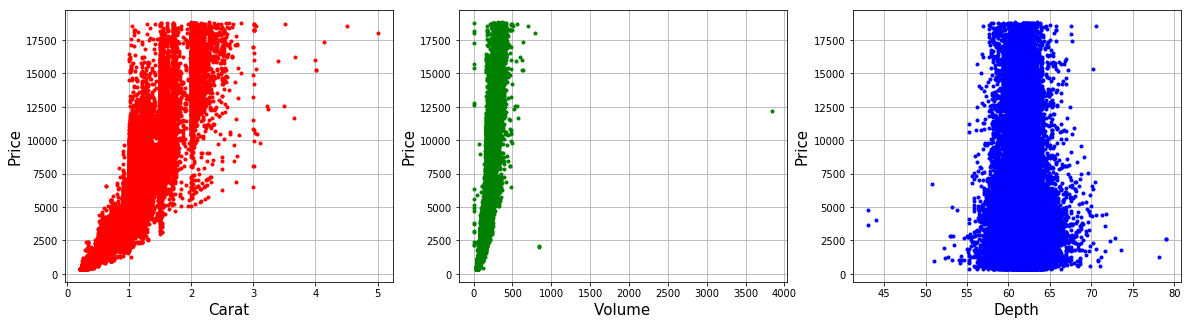

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(diamond["carat"],diamond["price"],"r.")
plt.xlabel("Carat",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.subplot(1,3,2)
plt.plot(diamond["volume"],diamond["price"],"g.")
plt.xlabel("Volume",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.subplot(1,3,3)
plt.plot(diamond["depth"],diamond["price"],"b.")
plt.xlabel("Depth",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()

### Outliers detected. Mainly from volume and depth graphs

## Find out columns strongly correlated to the price column

In [16]:
diamond.corr().loc["price"]

carat     0.921591
depth    -0.010647
table     0.127134
price     1.000000
x         0.884435
y         0.865421
z         0.861249
volume    0.902385
Name: price, dtype: float64

### Carat and Volume have a strong correlation with Price